# Clustering Handwritten Digits using k-Means, GMM, and DBSCAN

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# visualization style
plt.style.use("seaborn-v0_8")


In [ ]:
# load handwritten digits dataset
digits = datasets.load_digits()
X = digits.data       # (1797 samples, 64 features)
y = digits.target

print("Data shape:", X.shape)
print("Unique labels:", np.unique(y))


Data shape: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 3. reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

print("2D PCA shape:", X_2D.shape)


2D PCA shape: (1797, 2)


# Scatter Plot

In [ ]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=10)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter)
    plt.show()


# k-Means Clustering

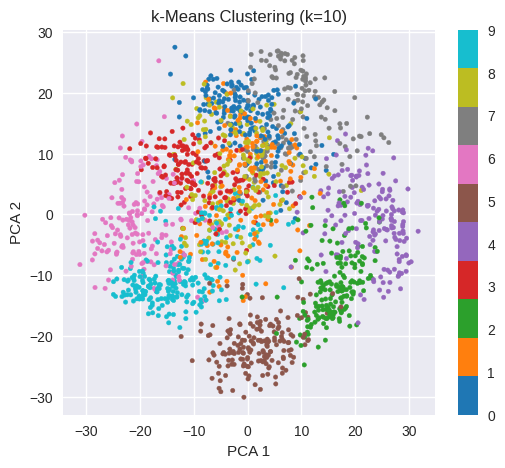

In [ ]:
k = 10  # digits 0–9

kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

plot_clusters(X_2D, labels_kmeans, "k-Means Clustering (k=10)")

# Gaussian Mixture Model (GMM)

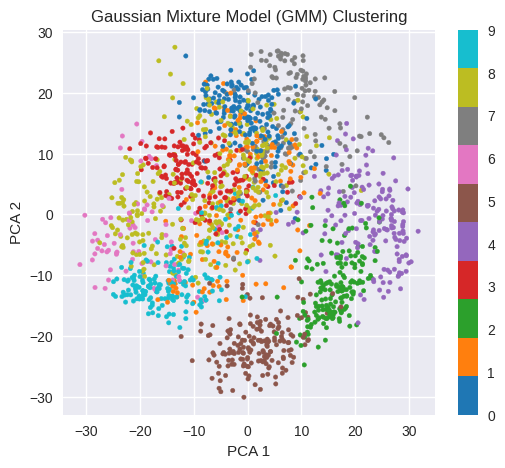

In [ ]:
gmm = GaussianMixture(n_components=10, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X)

plot_clusters(X_2D, labels_gmm, "Gaussian Mixture Model (GMM) Clustering")

# DBSCAN Clustering

DBSCAN detected clusters: 1
Noise points: 1797


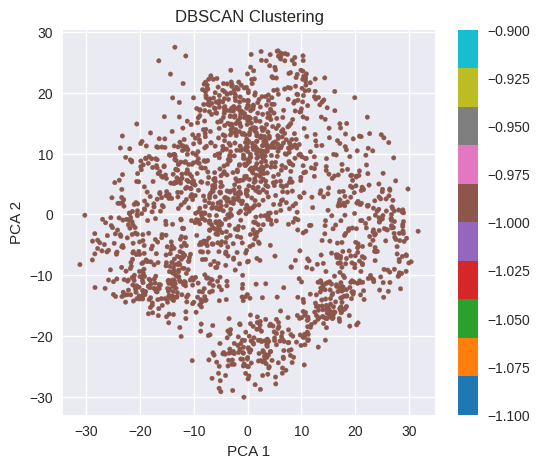

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=5)
labels_db = dbscan.fit_predict(X)

print("DBSCAN detected clusters:", len(set(labels_db)))
print("Noise points:", sum(labels_db == -1))

plot_clusters(X_2D, labels_db, "DBSCAN Clustering")

In [ ]:
# compare clustering results
print("Unique clusters found:")
print("k-Means:", len(np.unique(labels_kmeans)))
print("GMM:", len(np.unique(labels_gmm)))
print("DBSCAN:", len(np.unique(labels_db)))

Unique clusters found:
k-Means: 10
GMM: 10
DBSCAN: 1
